<a href="https://colab.research.google.com/github/AbhijeetS1112/NYC-Taxi-Trip-Time-Prediction----ALMA/blob/main/NYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City**

## **Problem Description**

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

##  **Data Description**

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
# Importing Basic Libraries
import pandas as pd # For Data Manipulation
import numpy as np  # for mathematical calculation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
import warnings    # For Remove warnings 
warnings.filterwarnings("ignore")
%matplotlib inline  
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


## **Mounting Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/NYC Taxi Data.csv")

## **Overview Of Dataset**

In [4]:
# checking Top 5 Values
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
# Checking bottom 5 Values
df.tail(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [6]:
# checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
# Checking size of the columns and rows
print("Number of rows is >> ",df.shape[0])
print("Number of columns is >> ",df.shape[1])

Number of rows is >>  1458644
Number of columns is >>  11


In [8]:
# Checking Features
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [9]:
# Checking Null Values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**So There Are No Null Values In our Dataset**
 

In [10]:
#checking Datatypes 
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

**Here you can see pickup_datetime and dropoff_datetime feature are in object so change in datetime format**

In [11]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"]=pd.to_datetime(df["dropoff_datetime"])

In [12]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [13]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [15]:
# extracting some Features in Datetime format features
df["pickup_weekday"]=df["pickup_datetime"].dt.day_name()
df["dropoff_weekday"]=df["dropoff_datetime"].dt.day_name()
df["pickup_weekday_num"]=df["pickup_datetime"].dt.weekday
df["pickup_hour"]=df["pickup_datetime"].dt.hour
df["month"]=df["pickup_datetime"].dt.month

**We have created the following features**:

- pickup_weekday which will contain the name of the day on which the ride was taken.
-pickup_weekday_num which will contain the day number instead of characters with Monday=0 and Sunday=6.

- pickup_hour with an hour of the day in the 24-hour format.

- pickup_month with month number with January=1 and December=12.


**so here calculating distance from geographical cooradinates**

In [16]:
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_cordinates=(pickup_lat,pickup_long)
  end_cordinates=(dropoff_lat,dropoff_long)
  
  return great_circle(start_cordinates,end_cordinates).km


In [17]:
# creating Feature Distance
df["distance"]=df.apply(lambda x: cal_distance(x["pickup_latitude"],x["pickup_longitude"],x["dropoff_latitude"],x["dropoff_longitude"]),axis=1)

In [19]:
df["distance"].value_counts()

0.000000    5897
0.000424      45
0.000424      43
0.000424      35
0.000424      22
            ... 
2.917715       1
4.698058       1
4.920641       1
2.988820       1
1.134044       1
Name: distance, Length: 1452360, dtype: int64

In [20]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance'],
      dtype='object')

In [21]:
# calulating speed
df["speed"]=(df.distance/(df.trip_duration/3600))

In [22]:
df["speed"].value_counts()

0.000000     5897
0.509011        5
0.152703        3
0.169670        3
0.190879        3
             ... 
8.733999        1
7.996145        1
5.057327        1
18.016528       1
20.618974       1
Name: speed, Length: 1452679, dtype: int64

**Now we will create a function that lets us determine what time of the day the ride was taken**.

We will divide the day into four parts:-

1.Morning ( 6:00 am to 11:59 pm),

2.Afternoon ( 12 noon to 3:59 pm),

3.Evening ( 4:00 pm to 9:59 pm), and

4.Late Night ( 10:00 pm to 5:59 am)

In [28]:
def time_of_day(x):
  if x in range(6,12):
    return "Morning"
  elif x in range(12,16):
    return "Afternoon"
  elif x in range(16,22):
    return "Evening"
  else:
    return "late_night"

# creating new column for time of the day 

df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
   

In [29]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_weekday,dropoff_weekday,pickup_weekday_num,pickup_hour,month,distance,speed,pickup_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,late_night


In [30]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_weekday', 'dropoff_weekday',
       'pickup_weekday_num', 'pickup_hour', 'month', 'distance', 'speed',
       'pickup_timeofday'],
      dtype='object')

## **Univariate Analysis**
Target Variable Trip_duration

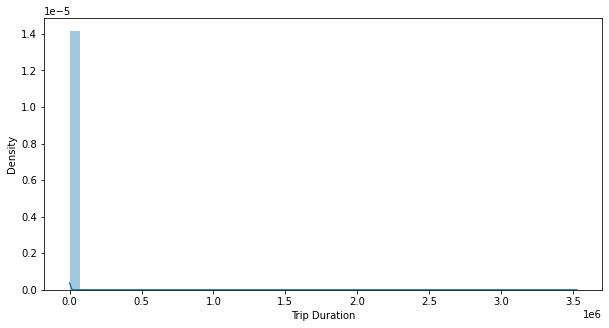

In [33]:
plt.figure(figsize=(10,5))
sns.distplot(df["trip_duration"])
plt.xlabel("Trip Duration")
plt.show()


**So u can see our target variable is rightle skewwed , so we use log transformation to normalize it**

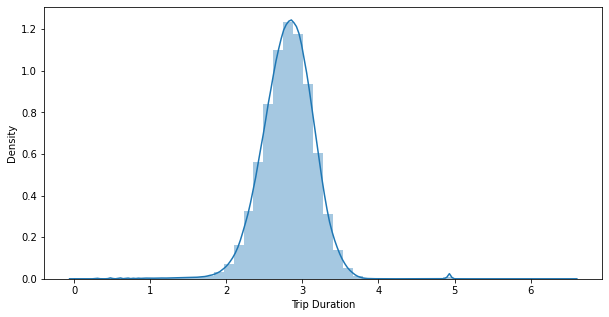

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df["trip_duration"]))
plt.xlabel("Trip Duration")
plt.show()

**so you can see our target variable is Normally distributed**

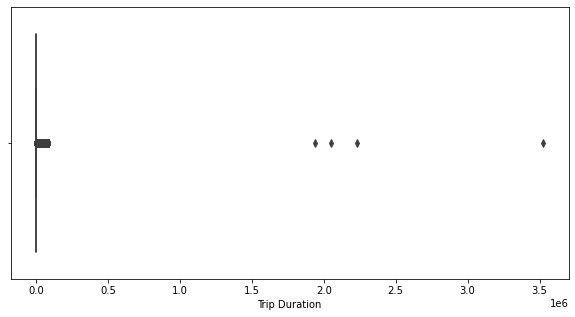

In [36]:
# Checking Outliers
plt.figure(figsize=(10,5))
sns.boxplot(df["trip_duration"])
plt.xlabel("Trip Duration")
plt.show()

In [38]:
#Calclating 0-100th percentille
for i in range(0,100,10):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


**So the 100th Percentile is an outlier**

In [39]:
for i in range(90,100):
  duration= df['trip_duration'].values
  duration= np.sort(duration, axis= None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1780
93 percentile value is 1869
94 percentile value is 1975
95 percentile value is 2104
96 percentile value is 2273
97 percentile value is 2497
98 percentile value is 2829
99 percentile value is 3440
100 percentile value is  3526282


**So Visualizing Number of trips taken in minutes**

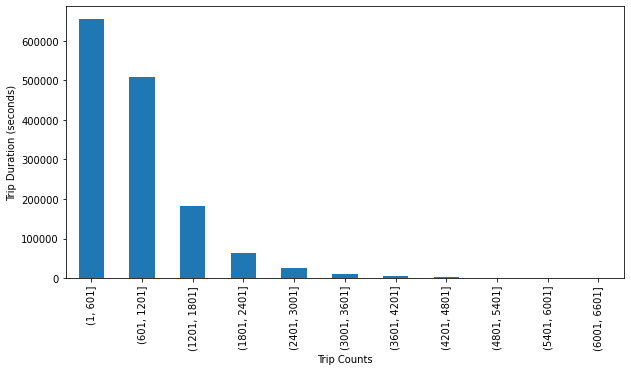

In [41]:
plt.figure(figsize = (10,5))
df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(1,7200,600))).count().plot(kind='bar')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

In [42]:
# seeing 10 Largest trip
print(df["trip_duration"].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


In [43]:
# Seeing 10 smallest Trip
print(df["trip_duration"].nsmallest(10))

35196     1
207497    1
269418    1
279493    1
285635    1
311745    1
346102    1
346959    1
404610    1
451396    1
Name: trip_duration, dtype: int64


**We can see that major chunk (99th percentile) of trip duration is completed in 3440 seconds nearly 1 hour**.

- There are very few trip which have duration greater than 5000 seconds.

- There are some durations with as low as 1 second. which points towards trips with 0 km distance.

We should get rid the outliers for the sake of data consistency. (Trip duration greater than 5000 seconds and also trip duration less than 30 seconds)

In [44]:
df=df[df.trip_duration <= 5000]
df=df[df.trip_duration >=30 ]

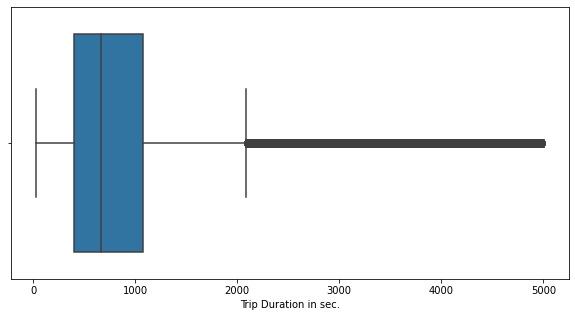

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(df.trip_duration)
plt.xlabel("Trip Duration in sec.")
plt.show()

- Major trip durations took between 10-20 mins to complete.

- We can observe that most of the trips took 0 - 30 mins to complete i.e. approx 1800 secs. Let's move ahead to next feature
